#### Importar Bibliotecas

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Abrindo o arquivo
vinhos = load_wine()
vinhos_df = pd.DataFrame(data=vinhos.data, columns=vinhos.feature_names)
vinhos_df = pd.DataFrame(data= np.c_[vinhos['data'], vinhos['target']], columns=vinhos['feature_names']+['target'])


In [3]:
vinhos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
vinhos_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [5]:
#Verificar dados faltantes
(vinhos_df.isnull() | vinhos_df.empty | vinhos_df.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
# Verificar dados publicados
vinhos_df.duplicated().sum()

0

In [7]:
# Descrever o DF
vinhos_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
# Verificar quantos target'marcas' temos no DataFrame
vinhos_df['target'].value_counts()

target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64

In [9]:
# Normalizar os dados
vinhos_df['target'].value_counts(normalize=True)

target
1.0    0.398876
0.0    0.331461
2.0    0.269663
Name: proportion, dtype: float64

<Axes: xlabel='target'>

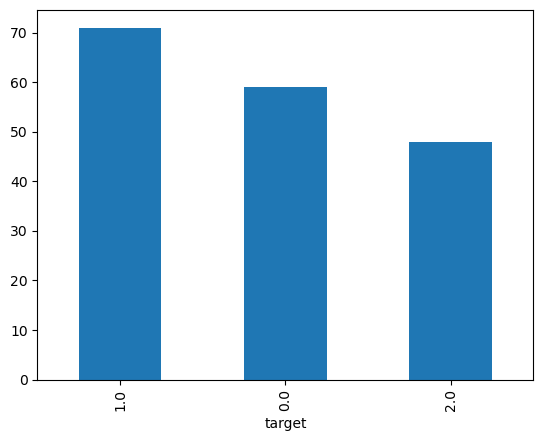

In [10]:
# Plotar Grafico de Barra dos targets
vinhos_df['target'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'magnesium'}>],
       [<Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'flavanoids'}>]], dtype=object)

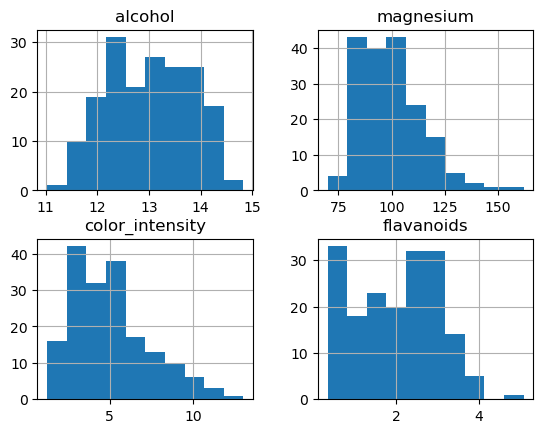

In [11]:
vinhos_df[['alcohol', 'magnesium', 'color_intensity', 'flavanoids']].hist()

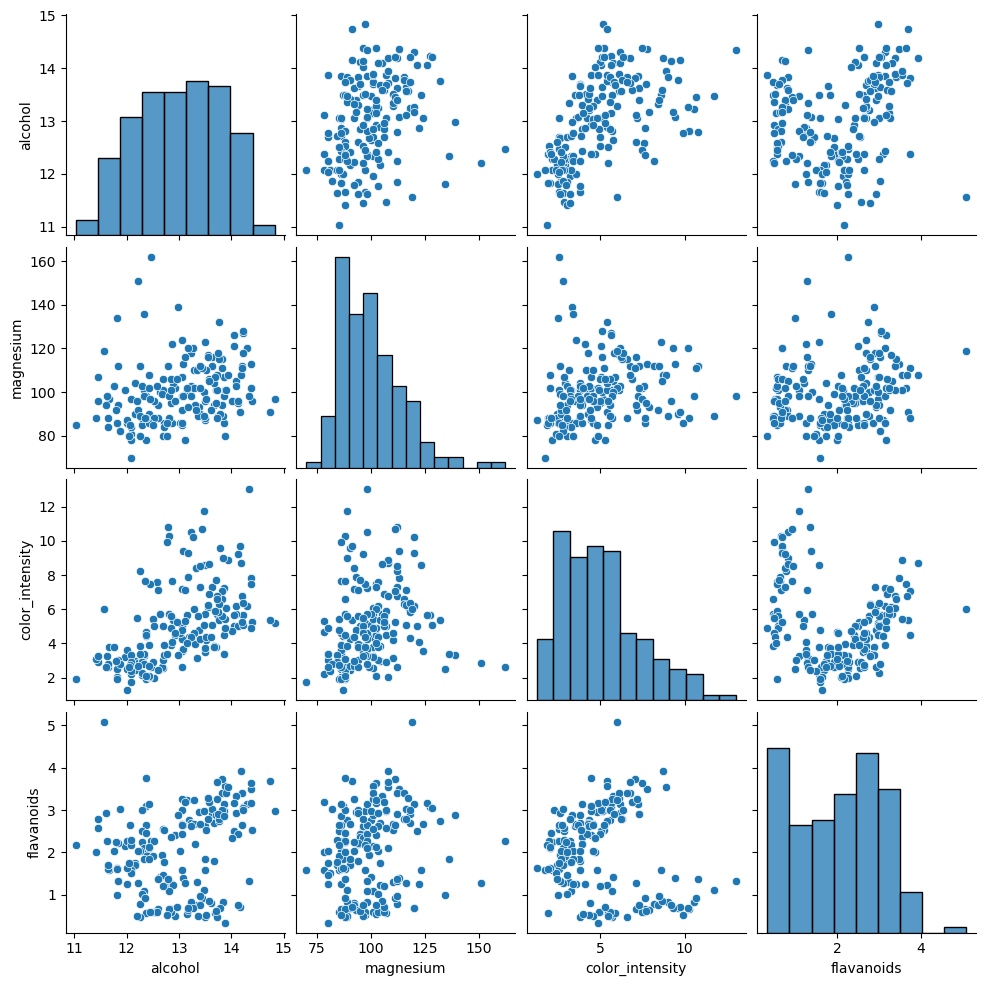

In [ ]:
# Verificando Correlações com o pairplot
sns.pairplot(vinhos_df[['alcohol', 'magnesium', 'color_intensity', 'flavanoids']])

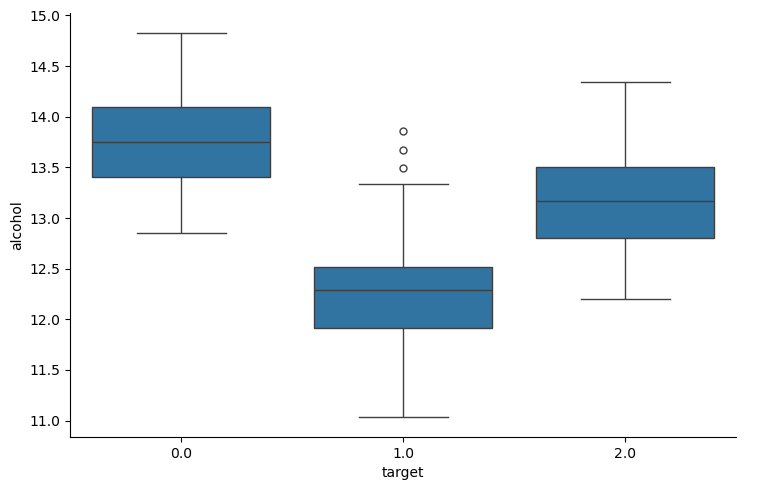

In [ ]:
# Plotar varios BoxPlot
sns.catplot(x='target',y='alcohol', data= vinhos_df, kind= 'box', aspect=1.5)

In [18]:
# Correlação
vinhos_df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: xlabel='color_intensity', ylabel='alcohol'>

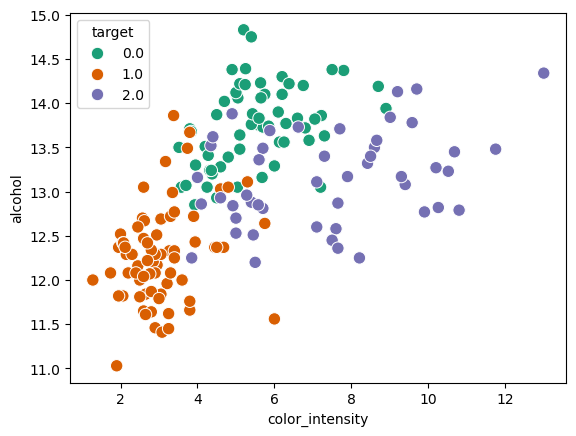

In [20]:
# grafico de Dispersão
sns.scatterplot(x='color_intensity',y='alcohol', hue='target', data=vinhos_df, palette='Dark2', s=80)

c:\Users\adair\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\adair\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\adair\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\adair\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\adair\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\adair\anaconda3\

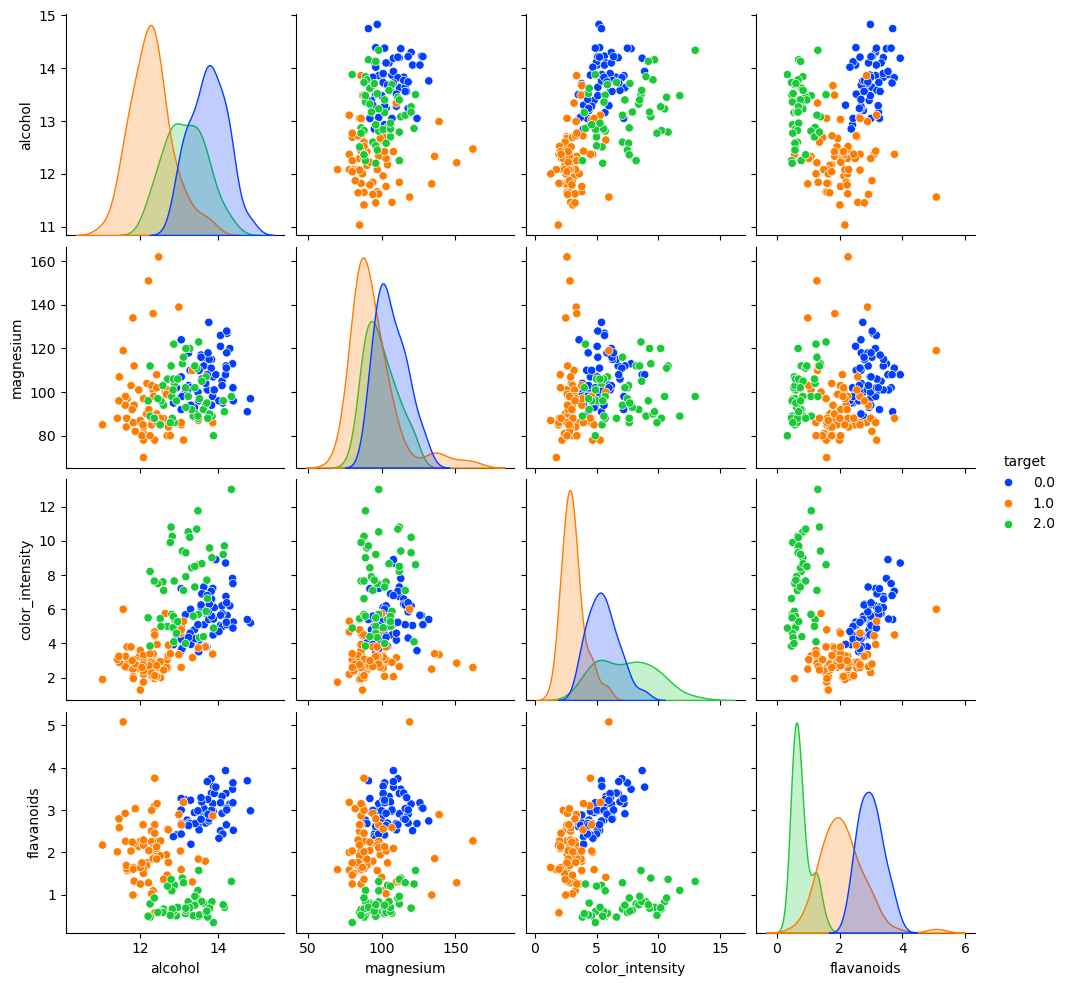

In [ ]:
# Visualizar relações entre múltiplas variáveis numéricas do DF
df = vinhos_df[['alcohol', 'magnesium', 'color_intensity', 'flavanoids', 'target']]
palette = sns.color_palette('bright')
sns.pairplot(data=df, palette=palette, hue= "target")


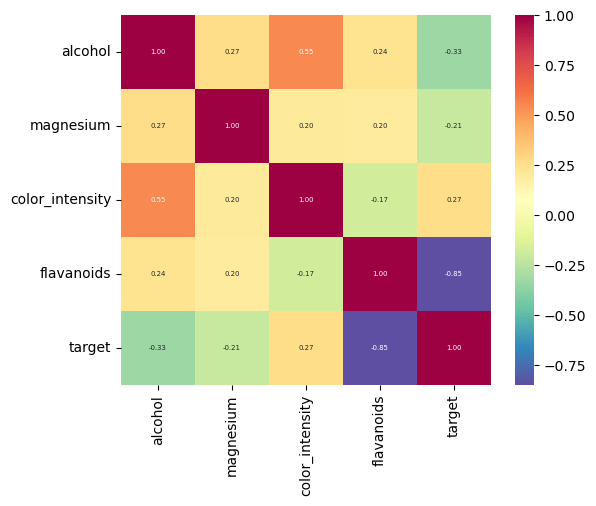

In [27]:
# Maneira mais simples de verificar as correlações
coormat = df.corr()

hm = sns.heatmap(coormat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 5},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap='Spectral_r')

plt.show()